# Verify the performance of a Convolutional Variational Autoencoder

Load a pre-trained model specified by an experiment/run trained by Train-Conv-VAE

This notebook run a number of visualizations that allow to illustrate the performance of the trained encoding. The verification here primarily happens through visual observation. 

In [1]:
import sys
sys.path.append("..")
# adding the Julian-8897-Conv-VAE-PyTorch into the path
from settings import Config
sys.path.append(Config()["conv_vae"]["code_dir"])
# from encoding_conv_vae.conv_vae import latest_json_and_model

from sensorprocessing import sp_conv_vae
from sensorprocessing import sp_helper

from helper import ui_choose_task, ui_choose_demo
import os
import matplotlib.pyplot as plt
from pathlib import Path
import random

# At some point in the development, this hack was necessary for some reason. 
# It seems that as of Feb 2025, the code runs on Windows and Linux without it.
#temp = pathlib.PosixPath
#pathlib.PosixPath = pathlib.WindowsPath

Loading pointer config file: C:\Users\lboloni\.config\BerryPicker\mainsettings.yaml
Loading machine-specific config file: G:\My Drive\LotziStudy\Code\PackageTracking\BerryPicker\settings\settings-LotziYoga.yaml


In [2]:
# Specify the experiment
experiment = "sensorprocessing_conv_vae"
run = "proprio_128" 
exp = Config().get_experiment(experiment, run)
sp = sp_conv_vae.get_sp_of_conv_vae_experiment(exp)

Note: no system dependent config file G:\My Drive\LotziStudy\Code\PackageTracking\BerryPicker\settings\experiment-config\LotziYoga\sensorprocessing_conv_vae\proprio_128_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: sensorprocessing_conv_vae/proprio_128 successfully loaded
c:\Users\lboloni\Documents\Code\_TempData\BerryPicker-experiments\sensorprocessing_conv_vae\proprio_128\models\models\VAE_Robot\0209_133250\config.json
Exists!
c:\Users\lboloni\Documents\Code\_TempData\BerryPicker-experiments\sensorprocessing_conv_vae\proprio_128\models\models\VAE_Robot\0209_133250\checkpoint-epoch10.pth


c:\Users\lboloni\Documents\Code\_Checkouts\BerryPicker\src\sensorprocessing\..\sensorprocessing\sp_conv_vae.py:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.checkpo

VanillaVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Se

# Visualize a random set of images from a task with an SP

In [3]:
def visualize_VAE(sp, picture_name, axoriginal, axreconstr):
    """Helper function to visualize the performance of the reconstruction of a VAE sensorprocessing object. Show the original and the reconstruction in fields of a picture."""
    transform = sp_helper.get_transform_to_robot()
    input, image = sp_helper.load_picturefile_to_tensor(picture_name, transform)
    # Running the input on the output
    output, mu, logvar = sp.model(input)
    # Output: the visual reconstruction
    output_for_pic = output[0].cpu().permute(1, 2, 0).detach().numpy()
    # Showing the input and the reconstruction    
    axoriginal.imshow(image)
    axoriginal.set_title("Original")
    axreconstr.imshow(output_for_pic)
    axreconstr.set_title("Reconstruct")
    return output, mu, logvar

In [4]:
# We are going to verify using some images randomly picked from a task. 

# task_id = None; demo_id = None
task_id = 5; demo_id = 0
_, task_dir = ui_choose_task(offer_task_creation=True, task_id=task_id)
print(task_dir)
demo_dir = ui_choose_demo(task_dir, demo_id=demo_id)
# FIXME: need to choose the demonstration
jpg_files = list(demo_dir.glob("*.jpg"))
n = 6
randomjpg = random.sample(jpg_files, n)


Demo directory C:\Users\lboloni\Documents\Code\_TempData\BerryPicker-demos\demos found with tasks [WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/boxmove'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/marker_solo'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/proprio_regressor_training'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/proprio_regressor_validation'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/proprio_sp_training'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/proprio_sp_validation'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/proprioception-cluttered'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/demos/proprioception-uncluttered'), WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/BerryPicker-demos/de

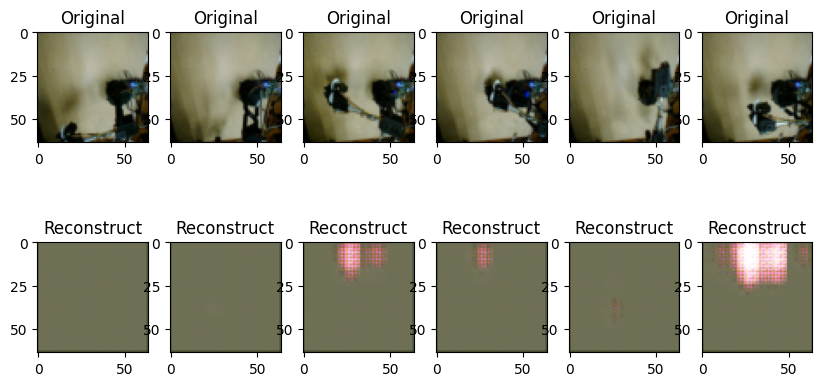

In [5]:
fig, axs = plt.subplots(2, n, figsize=(10, 5))
for i in range(n):
    visualize_VAE(sp, randomjpg[i], axs[0,i], axs[1,i])

In [ ]:

sp = sp_conv_vae.get_sp_of_conv_vae_experiment("vae_01")
fig, axs = plt.subplots(2, n, figsize=(10, 5))
for i in range(n):
    _, mu, _ = visualize_VAE(sp, randomjpg[i], axs[0,i], axs[1,i])
    print(mu)
    break

In [ ]:

# Try to do a decoding from the same mu
z2 = sp.model.reparameterize(mu, logvar)

for i in range(Config().values["robot"]["latent_encoding_size"]):
    z2[0][i] = z2[0][i] + 0.1

#z2[0][1] = 2.0
#z2[0][3] = 2.0
output2 = sp.model.decode(z2)
output_for_pic2 = output2[0].cpu().permute(1, 2, 0).detach().numpy()

# initial and new
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(output_for_pic)
axs[1].imshow(output_for_pic2)


# Generating random samples from the model

In [ ]:
import random

# z2 = model.reparameterize(mu, logvar)
# initial and new
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for x in range(0, 5):
    for y in range(0, 5):
            z2 = sp.model.reparameterize(mu, logvar)
            for i in range(Config().values["robot"]["latent_encoding_size"]):
                z2[0][i] += random.uniform(-0.5, 0.5)
            output2 = sp.model.decode(z2)
            output_for_pic2 = output2[0].cpu().permute(1, 2, 0).detach().numpy()
            axs[x][y].imshow(output_for_pic2)
#axs[0].imshow(output_for_pic)
#axs[1].imshow(output_for_pic2)